TABLE OF CONTENTS

- Imports Necessary Libraries

- Data Exploration
    - Exploring Dataset

- Data Cleaning
    - Missing Data
    - Duplicate Data
    - Detecting Outliers – IQR approach

- Feature Engineering
    - Correlation Analysis
    - Feature Encoding
    - Feature Extraction & Selection

- Model Training, Selection & Evaluation
    - OVERSAMPLING: SMOTE for inbalanced datasets
    - Scaling: Standardization
    - Evaluating metrics

- Model Pipeline
    - Save model
    - Load model
    - Test with user's data

---

VARIABLES:
- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase


---

# Importing the necessary libraries

In [403]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

# modelling libraries
import pickle
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import  XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Data Exploration

In [404]:
df = pd.read_csv('marketing_campaign.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0.0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,Yes
1,2174,1954,Graduation,Single,46344.0,1.0,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,No
2,4141,1965,Graduation,Together,71613.0,0.0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,No
3,6182,1984,Graduation,Together,26646.0,1.0,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,No
4,5324,1981,PhD,Married,58293.0,1.0,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,No


In [405]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                float64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                object
dtype: object

DateTime is categorical but it shouldn't be.

In [406]:
# to change the data format into Datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2223 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2211 non-null   float64       
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [408]:
 # to check the summary
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
count,2240.000000,2240.000000,2216.000000,2211.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0
mean,5592.159821,1968.805804,52247.251354,0.450023,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0
std,3246.662198,11.984069,25173.076661,0.539493,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0


In [409]:
# Z_CostContact and Z_Revenue variables don't carry information so we can drop these
df.drop(['Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)

In [410]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0.0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,Yes
1,2174,1954,Graduation,Single,46344.0,1.0,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,No
2,4141,1965,Graduation,Together,71613.0,0.0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,No
3,6182,1984,Graduation,Together,26646.0,1.0,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,No
4,5324,1981,PhD,Married,58293.0,1.0,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,No


In [411]:
# Change the label format
df['Response'] = df['Response'].map({'Yes': 1, 'No': 0})

In [412]:
# to check data balance
df['Response'].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

<Axes: xlabel='Response', ylabel='count'>

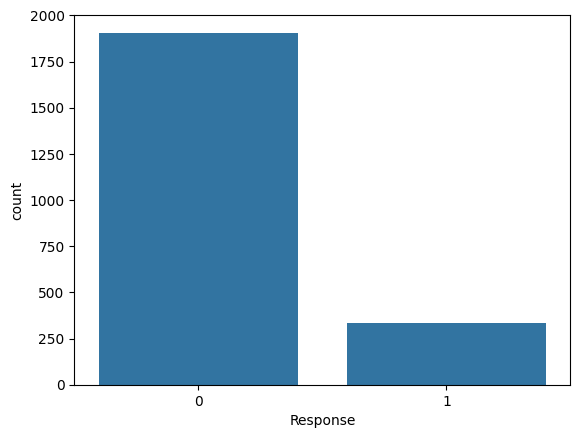

In [413]:
sns.countplot(data=df, x='Response')

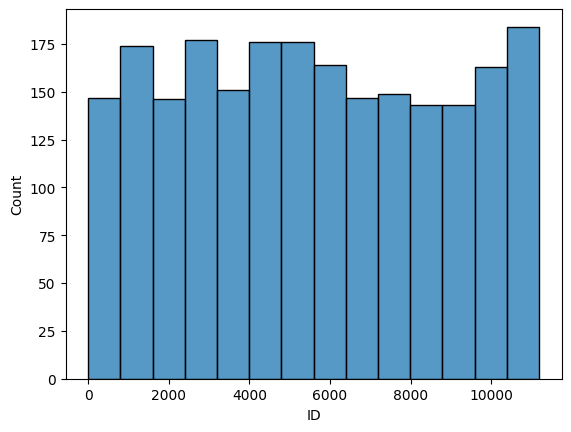

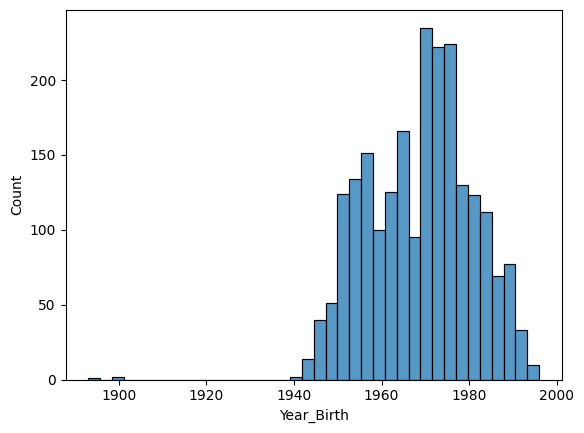

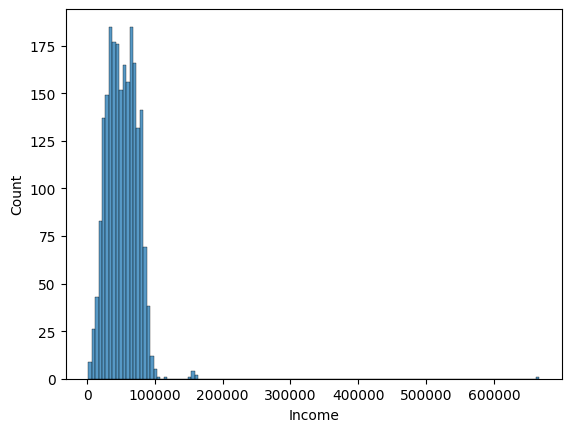

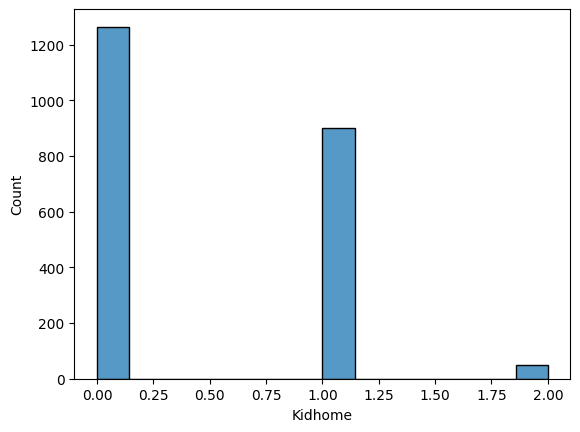

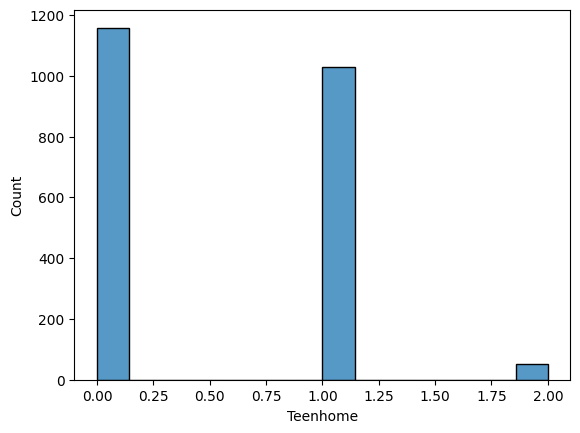

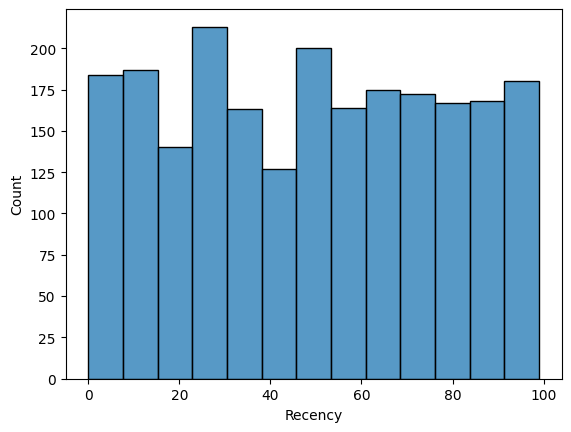

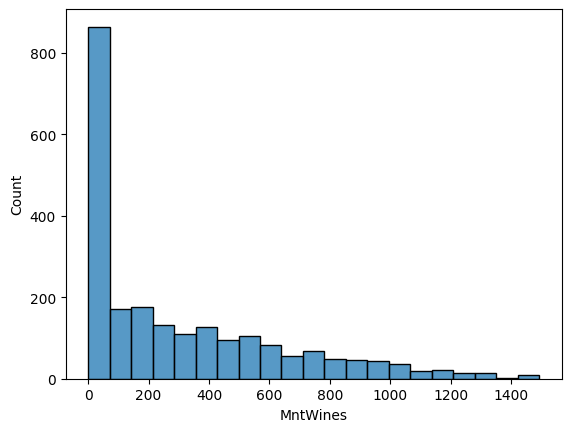

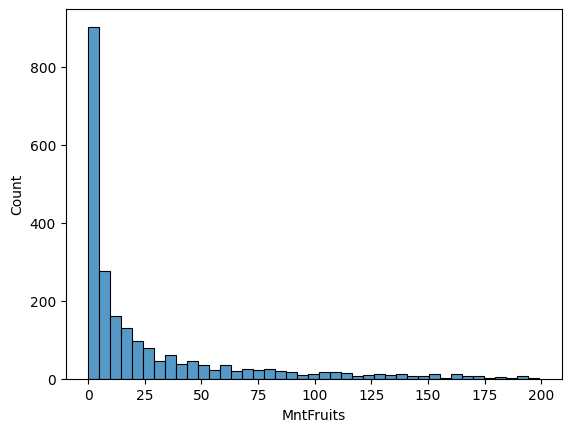

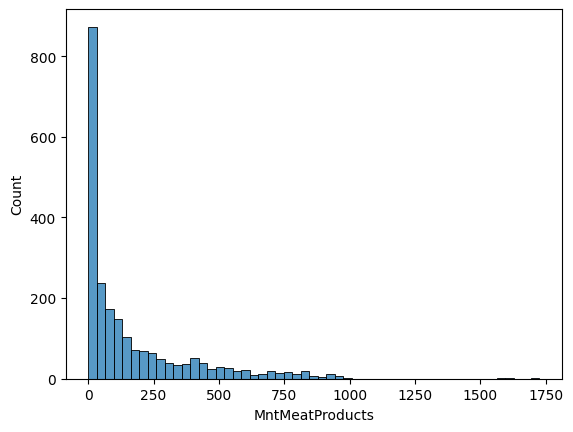

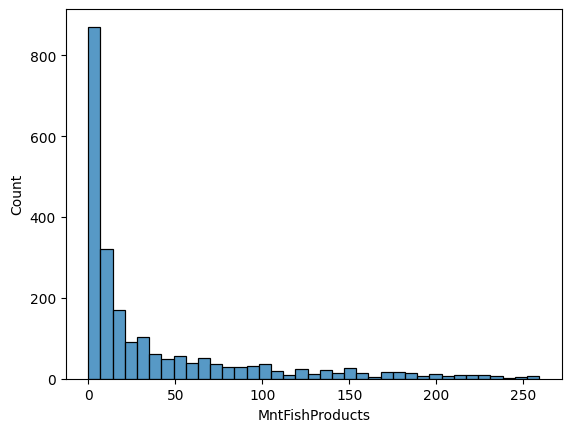

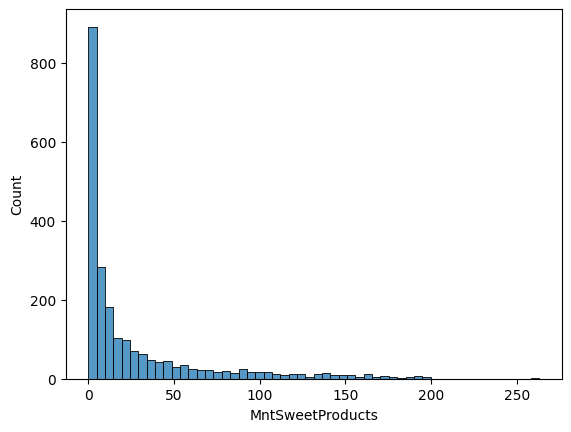

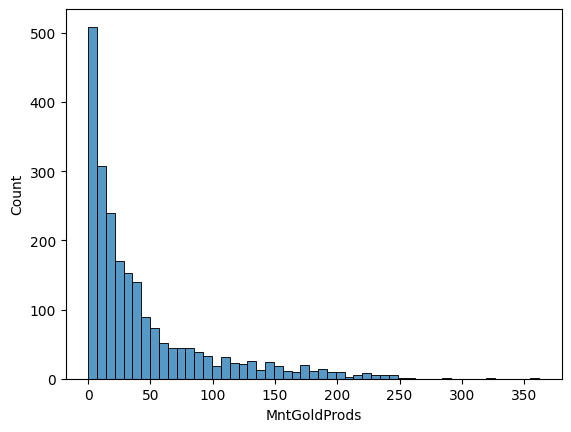

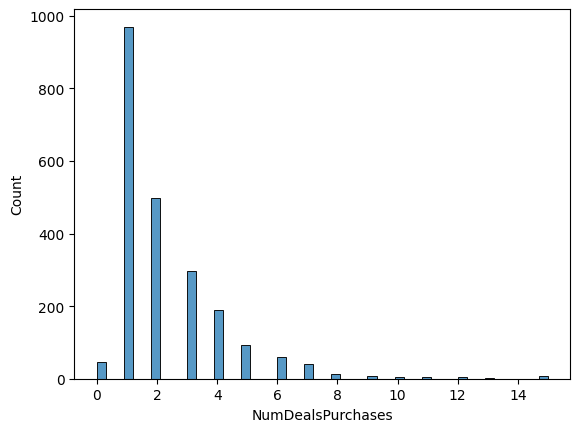

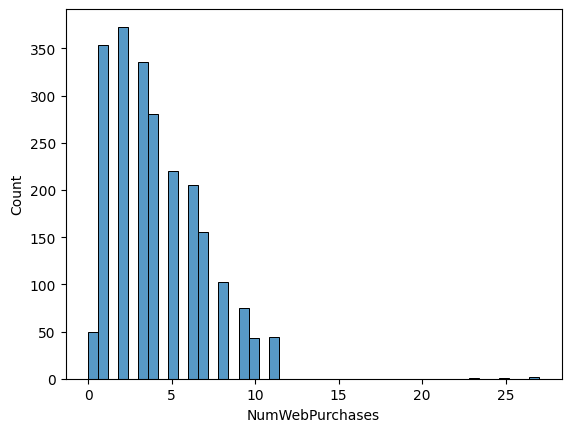

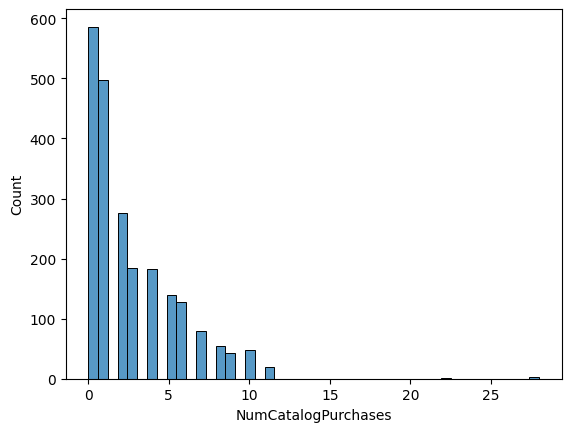

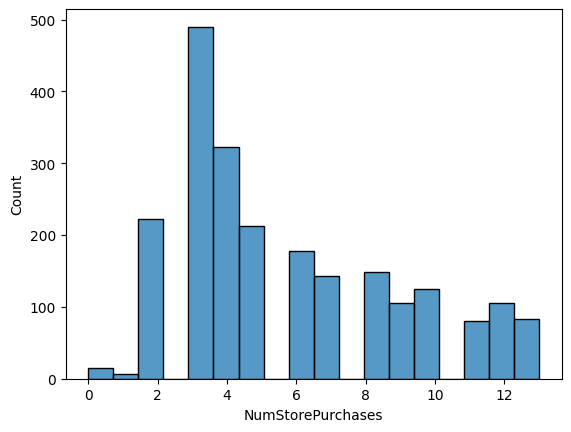

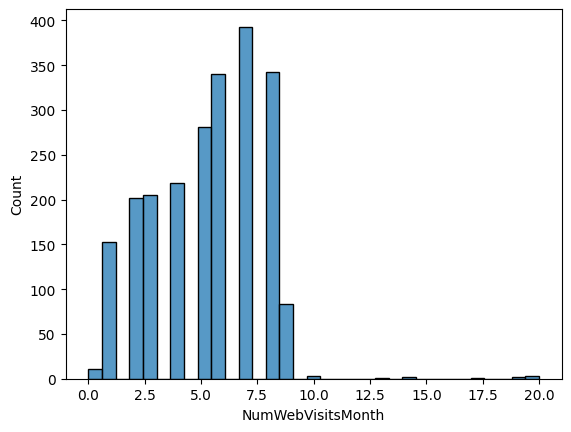

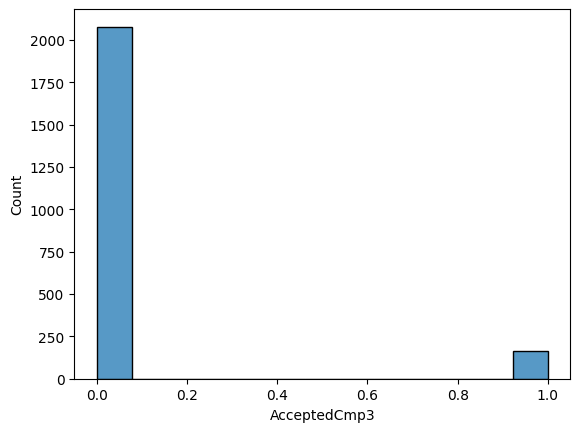

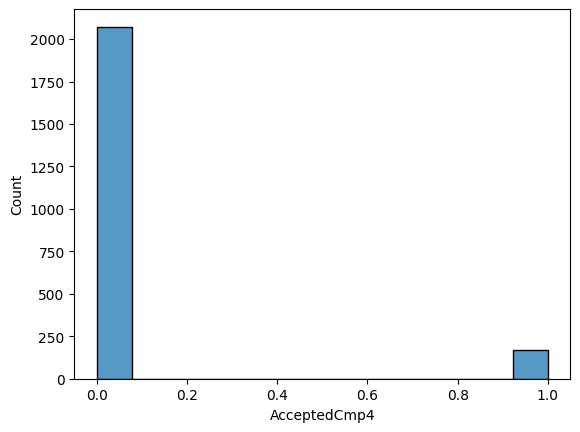

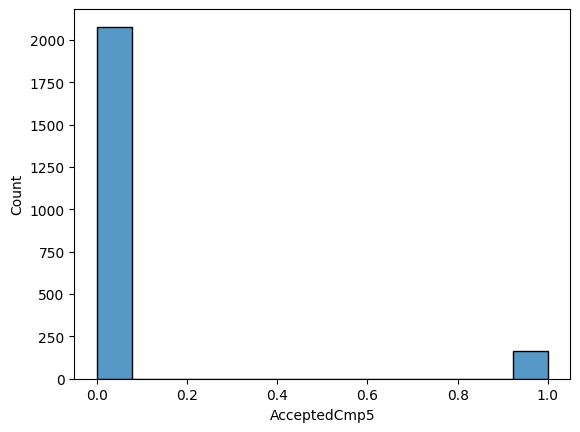

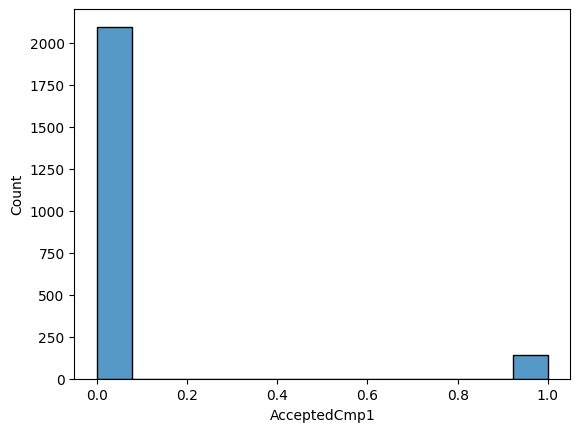

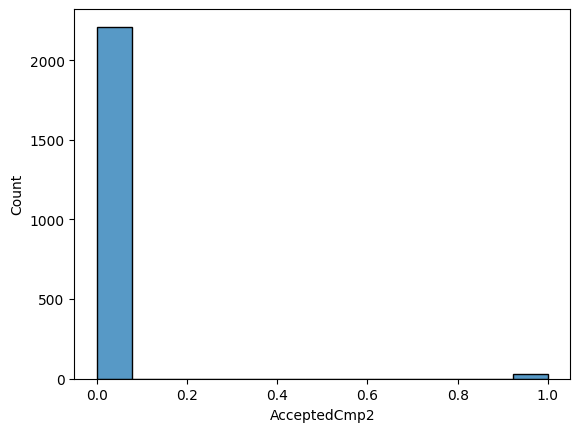

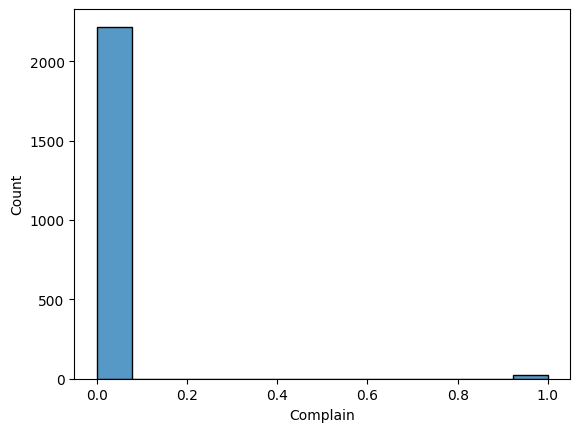

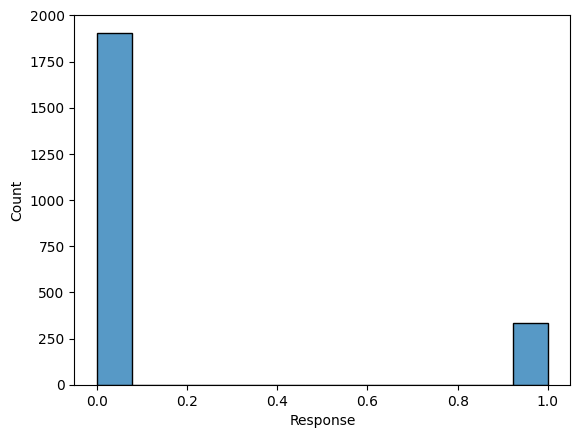

In [414]:
def hist(col):
    sns.histplot(data=df, x=col)
    plt.show()
    
numeric_columns = df.select_dtypes(include='number')

for col in numeric_columns:
    hist(col)
    
# Income is right-skewed.

---

'Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain' and 'Response'

columns looks like numeric but they are categorical.

---

Education Vs Response

In [415]:
df['Education'].value_counts()

Education
Graduation    1110
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

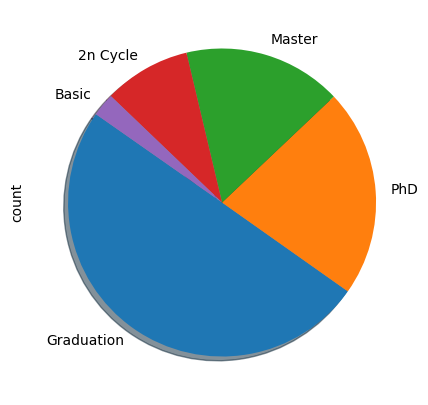

In [416]:
# Visualizing the distribution of 'Education' variable in the dataset

df['Education'].value_counts().plot.pie(subplots=True, shadow = True, figsize=(5, 5), startangle=145);

In [417]:
# Check the distribution of response by education variable
df[['Education','Response']].groupby('Education').agg({'Response':'value_counts'})

Response
Education  Response          
2n Cycle   0              181
           1               22
Basic      0               52
           1                2
Graduation 0              961
           1              149
Master     0              313
           1               57
PhD        0              385
           1              101

In [418]:
# Check the distribution of response by education variable
df[['Education','Response']].groupby('Education').agg({'Response':'mean'}).round(2)

,Response
Education,
2n Cycle,0.11
Basic,0.04
Graduation,0.13
Master,0.15
PhD,0.21


Marital_Status Vs Response

In [419]:
"""The values are inbalanced"""

df[['Marital_Status','Response']].groupby('Marital_Status').agg({'Response':'value_counts'})

Response
Marital_Status Response          
Absurd         0                1
               1                1
Alone          0                2
               1                1
Divorced       0              184
               1               48
Married        0              766
               1               98
Single         0              374
               1              106
Together       0              520
               1               60
Widow          0               58
               1               19
YOLO           0                1
               1                1

In [420]:
# As data are inbalanced, although it is not that relibale but should check
df[['Marital_Status','Response']].groupby('Marital_Status').agg({'Response':'mean'}).round(2)

,Response
Marital_Status,
Absurd,0.50
Alone,0.33
Divorced,0.21
Married,0.11
Single,0.22
Together,0.10
Widow,0.25
YOLO,0.50


From Income Perspective

In [421]:
df[['Education','Income']].groupby('Education').agg({'Income':'mean'}).round(2)

,Income
Education,
2n Cycle,47633.19
Basic,20306.26
Graduation,52734.94
Master,52917.53
PhD,56145.31


In [422]:
df[['Marital_Status','Income']].groupby('Marital_Status').agg({'Income':'mean'}).round(2)

,Income
Marital_Status,
Absurd,72365.50
Alone,43789.00
Divorced,52834.23
Married,51724.98
Single,50995.35
Together,53245.53
Widow,56481.55
YOLO,48432.00


# Data Cleaning

Missing Data

In [423]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education              17
Marital_Status          0
Income                 24
Kidhome                29
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [424]:
# Imputing missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

new_values = imp_mean.fit_transform(df[['Income']])
df['Income'] = new_values.ravel()

df[['Education', 'Kidhome']] = imp_mode.fit_transform(df[['Education', 'Kidhome']])

Duplicate Data


In [425]:
df.duplicated().sum()

np.int64(0)

Detecting Outliers

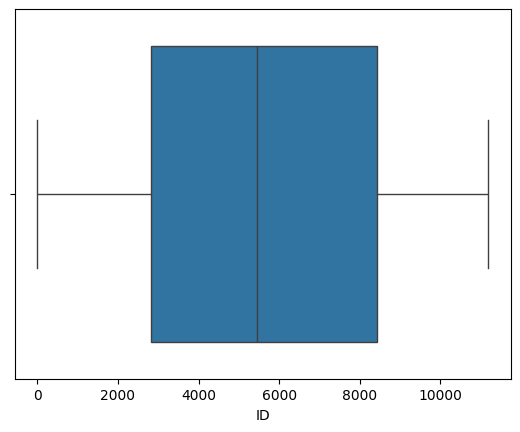

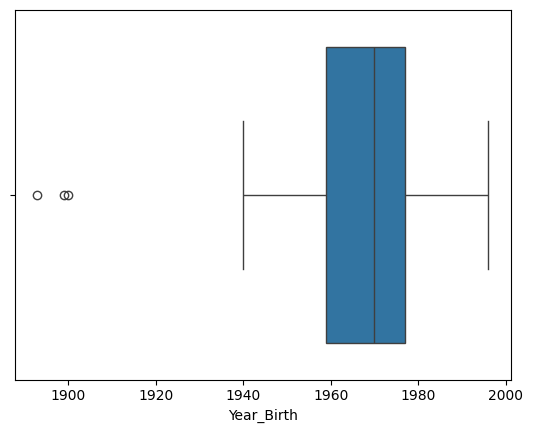

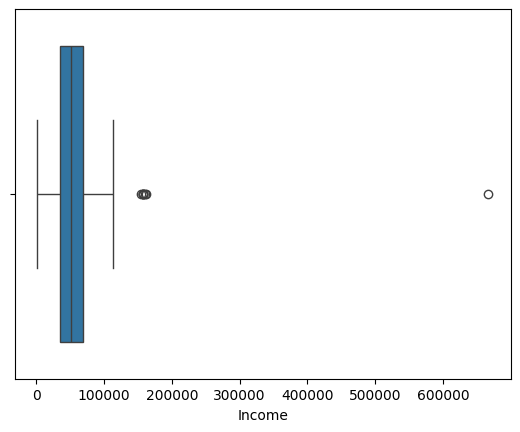

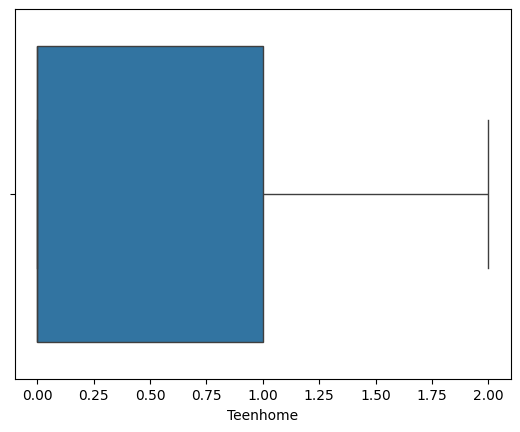

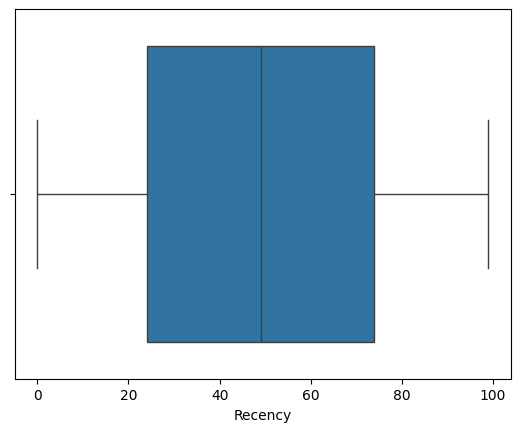

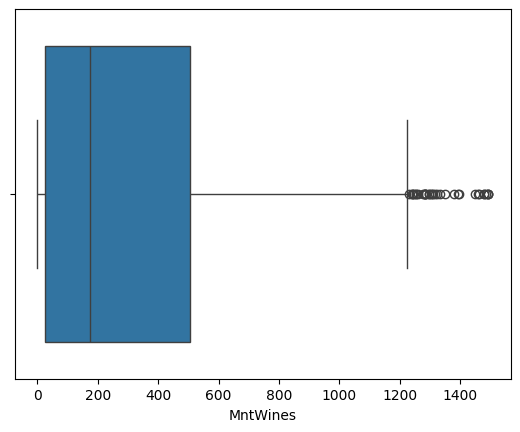

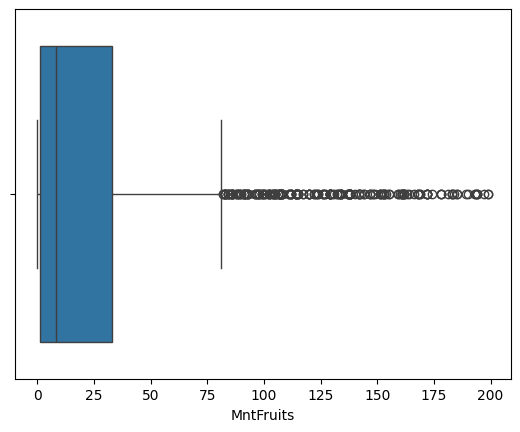

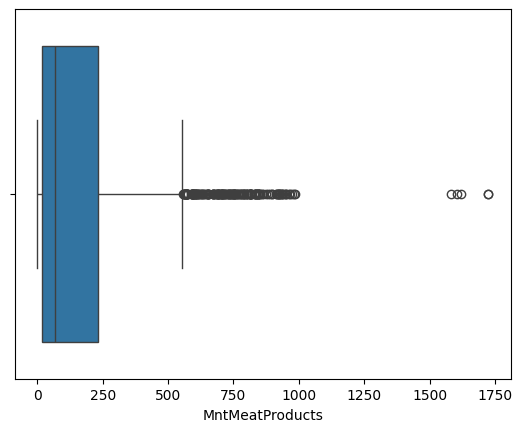

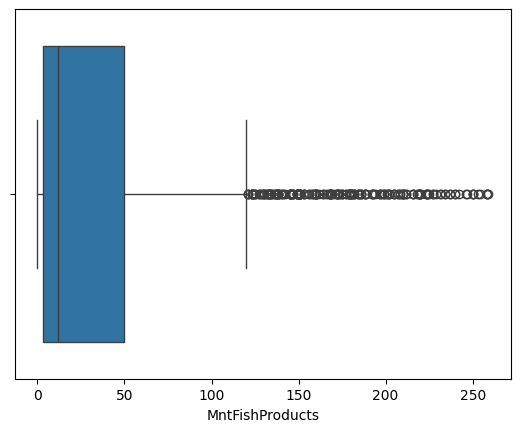

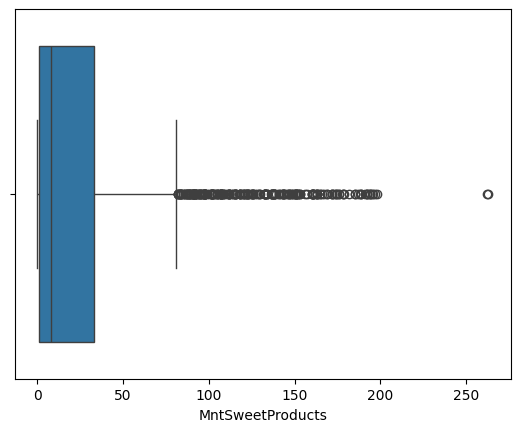

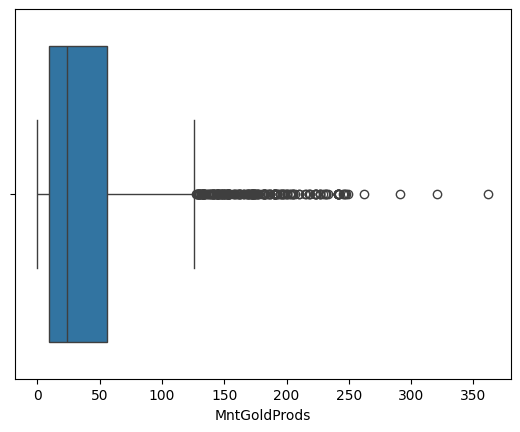

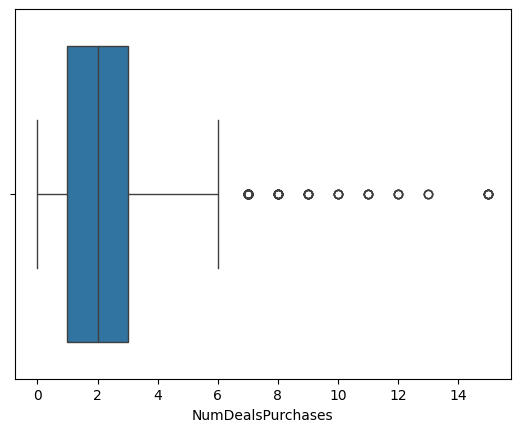

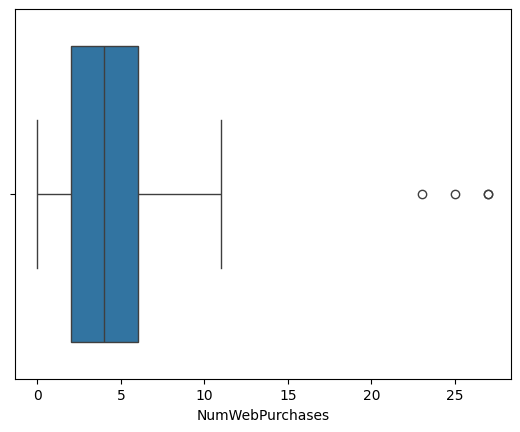

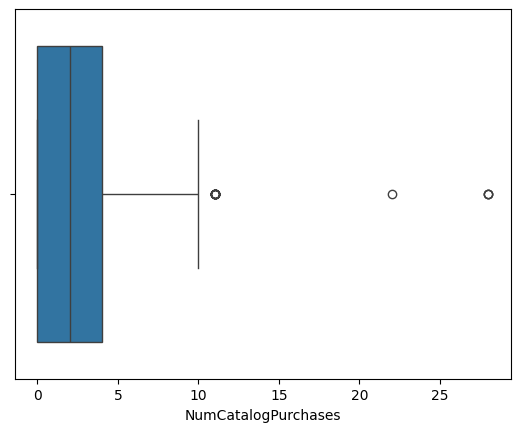

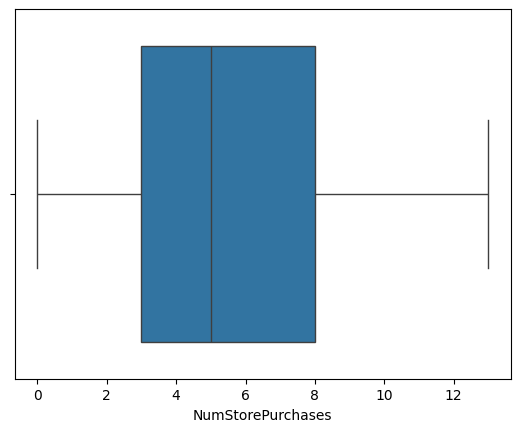

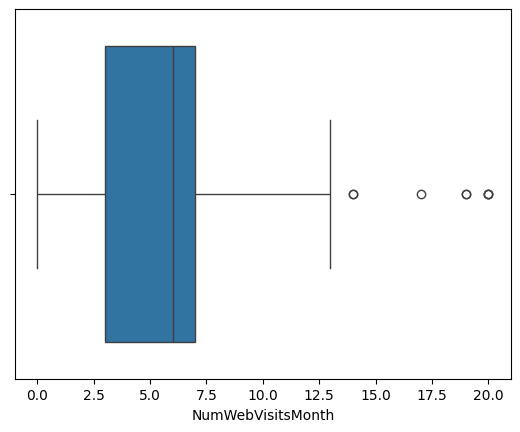

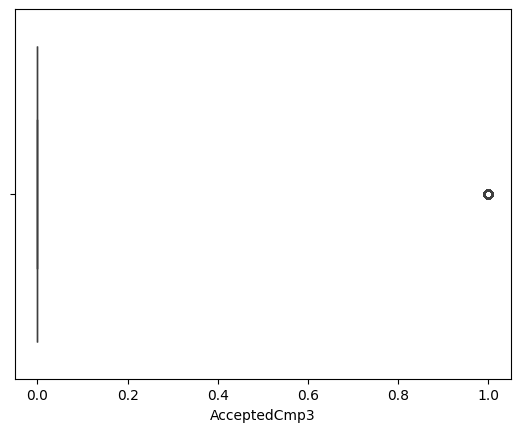

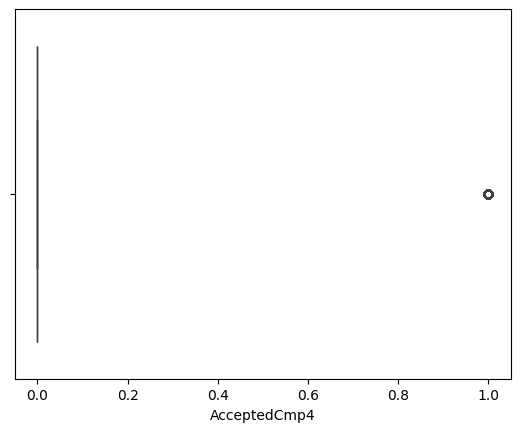

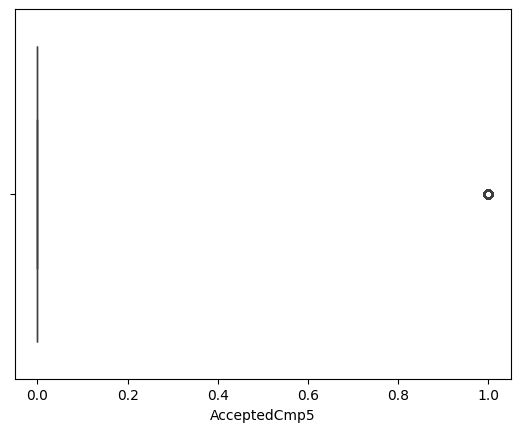

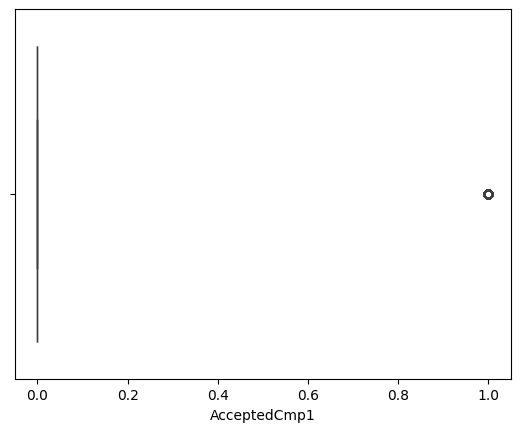

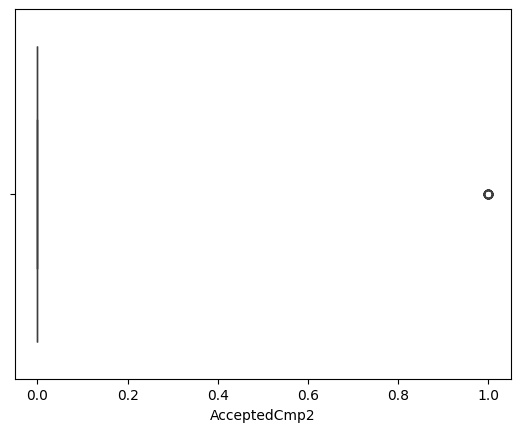

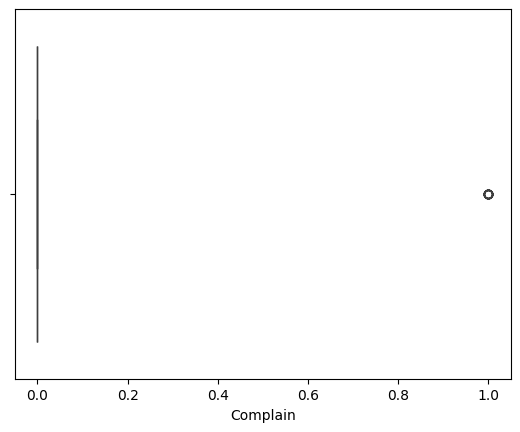

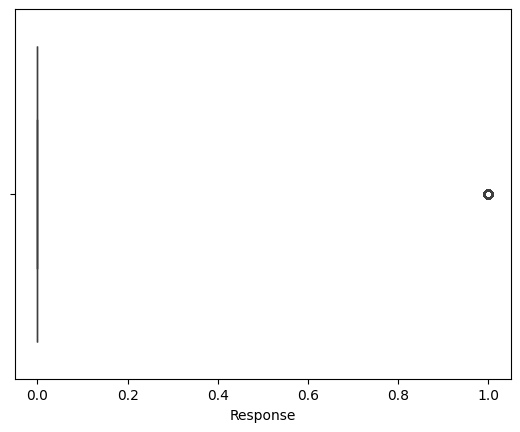

In [426]:
def box_plot(col):
    sns.boxplot(data=df, x=col)
    plt.show()
    
numeric_columns = df.select_dtypes(include='number')

for col in numeric_columns:
    box_plot(col)

In [427]:
def detect_outliers(col_name):
  df_col_name = df[col_name]

  # to define upper and lower outlier boundaries by third and first quartiles
  Q1 = df_col_name.quantile(0.25)
  Q3 = df_col_name.quantile(0.75)
  IQR = Q3-Q1 
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  outliers = (df_col_name < lower_bound) | (df_col_name > upper_bound) 
  outliers_index = df_col_name[outliers].index

  print(f"{col_name} variable\n"
        f"Outliers boundaries: {lower_bound}, {upper_bound}\n"
        f"Number of outliers : {len(outliers_index)}")

  return col_name, lower_bound, upper_bound, outliers_index

Detecting outliers for Year_Birth variable

In [428]:
col_name, lower_bound, upper_bound, outliers_index = detect_outliers('Year_Birth')

Year_Birth variable
Outliers boundaries: 1932.0, 2004.0
Number of outliers : 3


In [429]:
# drop the outliers
df.drop(index=(outliers_index), inplace=True)

Income variable outliers detection

In [430]:
col_name, lower_bound, upper_bound, outliers_index = detect_outliers('Income')

Income variable
Outliers boundaries: -13614.0, 117418.0
Number of outliers : 8


In [431]:
# to check if there is a dirty data like minus income
df[df['Income']<0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


In [432]:
outliers_index

Index([164, 617, 655, 687, 1300, 1653, 2132, 2233], dtype='int64')

In [433]:
# as I explored, capping the outliers for right-skewed variable is replacing with upper_bound
df['Income'] = df['Income'].clip(upper=upper_bound)

In [434]:
col_name, lower_bound, upper_bound, outliers_index = detect_outliers('Income')

Income variable
Outliers boundaries: -13614.0, 117418.0
Number of outliers : 0


# Feature Engineering

Correlation Analysis

In [435]:
df.corr(numeric_only=True)

,ID,Year_Birth,Income,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,1.000000,0.003024,0.003009,-0.003543,-0.046755,-0.021181,0.007080,-0.002622,-0.023181,-0.006444,...,-0.001893,-0.014062,-0.008104,-0.035959,-0.025292,-0.005062,-0.021524,-0.015027,0.031520,-0.021810
Year_Birth,0.003024,1.000000,-0.203999,-0.363350,-0.019670,-0.163035,-0.013751,-0.030927,-0.042519,-0.019571,...,-0.125439,-0.139465,0.117570,0.061013,-0.064341,0.015322,-0.008227,-0.007657,-0.004479,0.018424
Income,0.003009,-0.203999,1.000000,0.036162,0.006457,0.704940,0.519272,0.683816,0.532976,0.532661,...,0.690522,0.650720,-0.648336,-0.014217,0.223958,0.404415,0.333817,0.106893,-0.028096,0.166558
Teenhome,-0.003543,-0.363350,0.036162,1.000000,0.017115,0.005409,-0.175951,-0.260820,-0.203900,-0.162218,...,-0.110285,0.050517,0.134491,-0.042823,0.038790,-0.190227,-0.140288,-0.015664,0.007591,-0.154730
Recency,-0.046755,-0.019670,0.006457,0.017115,1.000000,0.016668,-0.003592,0.023705,0.001532,0.023045,...,0.025449,0.001117,-0.021959,-0.032976,0.018890,0.000956,-0.019258,-0.001764,0.005398,-0.198568
MntWines,-0.021181,-0.163035,0.704940,0.005409,0.016668,1.000000,0.388518,0.561993,0.399073,0.385992,...,0.634784,0.642433,-0.320337,0.062201,0.373532,0.471969,0.354365,0.206040,-0.035930,0.247392
MntFruits,0.007080,-0.013751,0.519272,-0.175951,-0.003592,0.388518,1.000000,0.542057,0.594438,0.567054,...,0.487307,0.463168,-0.417427,0.014983,0.010402,0.212027,0.195380,-0.009701,-0.002800,0.125904
MntMeatProducts,-0.002622,-0.030927,0.683816,-0.260820,0.023705,0.561993,0.542057,1.000000,0.567880,0.523418,...,0.723519,0.480110,-0.539203,0.018331,0.103053,0.372212,0.310096,0.043090,-0.020720,0.236640
MntFishProducts,-0.023181,-0.042519,0.532976,-0.203900,0.001532,0.399073,0.594438,0.567880,1.000000,0.579553,...,0.534033,0.460099,-0.445760,0.000370,0.016864,0.198163,0.260908,0.002583,-0.018818,0.111415
MntSweetProducts,-0.006444,-0.019571,0.532661,-0.162218,0.023045,0.385992,0.567054,0.523418,0.579553,1.000000,...,0.490497,0.448801,-0.423249,0.001491,0.028612,0.258848,0.241875,0.009972,-0.020404,0.117366


In [436]:
df.corr(numeric_only=True)['Response'].sort_values(ascending=False)

Response               1.000000
AcceptedCmp5           0.328182
AcceptedCmp1           0.293882
AcceptedCmp3           0.254144
MntWines               0.247392
MntMeatProducts        0.236640
NumCatalogPurchases    0.220894
AcceptedCmp4           0.176890
AcceptedCmp2           0.169249
Income                 0.166558
NumWebPurchases        0.148453
MntGoldProds           0.140693
MntFruits              0.125904
MntSweetProducts       0.117366
MntFishProducts        0.111415
NumStorePurchases      0.038855
Year_Birth             0.018424
NumDealsPurchases      0.001854
Complain               0.000185
NumWebVisitsMonth     -0.004449
ID                    -0.021810
Teenhome              -0.154730
Recency               -0.198568
Name: Response, dtype: float64

While exploring data, education levels and marital status are very specific, have too many categories. This could make difficulties for encoding.

In [437]:
# to map the Education
edu = {'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master' :'Postgraduate', 'PhD' :'Postgraduate'}

df['Education'] = df['Education'].map(edu)

In [438]:
df['Education'].value_counts()

Education
Graduate         1127
Postgraduate      855
Undergraduate     255
Name: count, dtype: int64

Encoding Education with get_dummies

In [439]:
df = pd.get_dummies(df, columns = ["Education"], prefix = ["Education"])

In [440]:
df.head()

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_Graduate,Education_Postgraduate,Education_Undergraduate
0,5524,1957,Single,58138.0,0.0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,1,True,False,False
1,2174,1954,Single,46344.0,1.0,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,0,True,False,False
2,4141,1965,Together,71613.0,0.0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,0,True,False,False
3,6182,1984,Together,26646.0,1.0,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,0,True,False,False
4,5324,1981,Married,58293.0,1.0,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,0,False,True,False


In [441]:
# There are too many category for 'Marital Status'
# Categories are divided into two groups representing married and single status.
# Married and Together are represent by 1, Single, Divorced, Widow, Alone, Absurd and YOLO represent by 0.

df['NewMaritalStatus'] = np.where((df['Marital_Status']=='Together')|(df['Marital_Status']=='Married'), 1, 0)

In [442]:
df.head()

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_Graduate,Education_Postgraduate,Education_Undergraduate,NewMaritalStatus
0,5524,1957,Single,58138.0,0.0,0,2012-09-04,58,635,88,...,0,0,0,0,0,1,True,False,False,0
1,2174,1954,Single,46344.0,1.0,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,True,False,False,0
2,4141,1965,Together,71613.0,0.0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,True,False,False,1
3,6182,1984,Together,26646.0,1.0,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,True,False,False,1
4,5324,1981,Married,58293.0,1.0,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,False,True,False,1


Feature Extraction & Selection

Generating new more important features 

In [443]:
# Year_Birth is not a good predictor for Response label.
# So, I generate age column by subtracting from current year
df['Age'] = 2025 - df['Year_Birth']
df['Age'] = 2025 - df['Year_Birth']
df['Age'].head()

0    68
1    71
2    60
3    41
4    44
Name: Age, dtype: int64

Dt_Customer variable convert to month

In [444]:
df['Dt_Customer'].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [445]:
# to create Year and Month columns
df['Year'] = df["Dt_Customer"].dt.year
df['Month'] = df["Dt_Customer"].dt.month

In [446]:
df[['Year', 'Month']].head()

,Year,Month
0,2012,9
1,2014,3
2,2013,8
3,2014,2
4,2014,1


In [447]:
# Drop all unnecessary columns
# Drop "ID" as well
df.drop(['ID', 'Marital_Status', 'Year_Birth', 'Dt_Customer'], axis=1, inplace=True)

In [448]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp2,Complain,Response,Education_Graduate,Education_Postgraduate,Education_Undergraduate,NewMaritalStatus,Age,Year,Month
0,58138.0,0.0,0,58,635,88,546,172,88,88,...,0,0,1,True,False,False,0,68,2012,9
1,46344.0,1.0,1,38,11,1,6,2,1,6,...,0,0,0,True,False,False,0,71,2014,3
2,71613.0,0.0,0,26,426,49,127,111,21,42,...,0,0,0,True,False,False,1,60,2013,8
3,26646.0,1.0,0,26,11,4,20,10,3,5,...,0,0,0,True,False,False,1,41,2014,2
4,58293.0,1.0,0,94,173,43,118,46,27,15,...,0,0,0,False,True,False,1,44,2014,1


Feature Selection & Feature Importance

In [449]:
X = df.drop('Response', axis=1)
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape

((1789, 28), (1789,))

In [450]:
# We'll train a model to identify the importance of features
rf_model = RandomForestClassifier().fit(X_train,y_train)
predicted_values = rf_model.predict(X_test)
print('--Confusion Matrix--')
cof_matrix = confusion_matrix(y_test, predicted_values)
print(cof_matrix)

print('\n')
print("Precision : ", precision_score(y_test, predicted_values))
print("Recall : ", recall_score(y_test, predicted_values))
print("F1 Score : ", f1_score(y_test, predicted_values))
print("Accuracy : ", accuracy_score(y_test, predicted_values))

--Confusion Matrix--
[[368   8]
 [ 45  27]]


Precision :  0.7714285714285715
Recall :  0.375
F1 Score :  0.5046728971962616
Accuracy :  0.8816964285714286


In [451]:
rf_model.feature_importances_

array([0.06992088, 0.00633437, 0.01101732, 0.09813657, 0.07760289,
       0.04356637, 0.07914619, 0.04591291, 0.04718337, 0.05690759,
       0.02995936, 0.02982032, 0.03988759, 0.0385764 , 0.03772481,
       0.04079179, 0.0105114 , 0.03768396, 0.03639122, 0.00877225,
       0.00101424, 0.00781709, 0.01036005, 0.00347403, 0.02011554,
       0.0493034 , 0.02974227, 0.03232581])

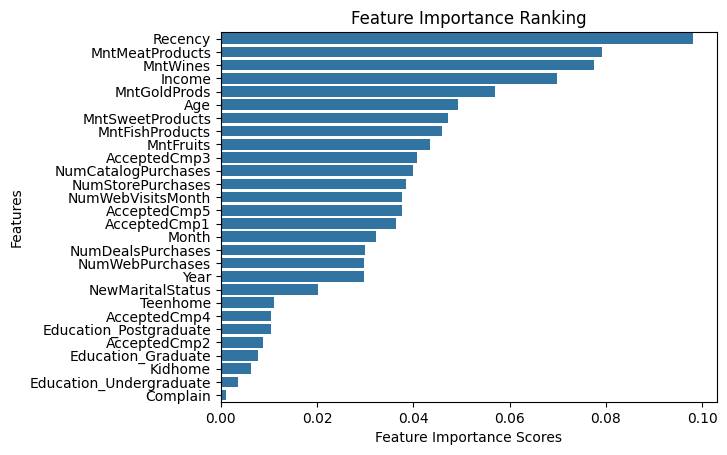

In [452]:
# to check feature importances
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Scores')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")
plt.show()

Complain columns has lowest feature importance. So we will drop it while training.



Hence, I will try to create more effective columns than those with less important column.

---

In [453]:
# Collecting all expenses column together
df['TotalMntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [454]:
# to create a new column with the total family member size
# plus 1 to NewMaritalStatus: if it is married or together(1), total gurdian will be 2.

df['FamilySize'] = df['Teenhome'] + df['Kidhome'] + df['NewMaritalStatus'] + 1

In [455]:
# drop the unnecessary columns
columns = ['Complain','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Kidhome','Teenhome']
df.drop(columns, inplace=True, axis=1)

In [456]:
df.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,...,Response,Education_Graduate,Education_Postgraduate,Education_Undergraduate,NewMaritalStatus,Age,Year,Month,TotalMntSpent,FamilySize
0,58138.0,58,3,8,10,4,7,0,0,0,...,1,True,False,False,0,68,2012,9,1617,1.0
1,46344.0,38,2,1,1,2,5,0,0,0,...,0,True,False,False,0,71,2014,3,27,3.0
2,71613.0,26,1,8,2,10,4,0,0,0,...,0,True,False,False,1,60,2013,8,776,2.0
3,26646.0,26,2,2,0,4,6,0,0,0,...,0,True,False,False,1,41,2014,2,53,3.0
4,58293.0,94,5,5,3,6,5,0,0,0,...,0,False,True,False,1,44,2014,1,422,3.0


In [457]:
df.dtypes

Income                     float64
Recency                      int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
AcceptedCmp3                 int64
AcceptedCmp4                 int64
AcceptedCmp5                 int64
AcceptedCmp1                 int64
AcceptedCmp2                 int64
Response                     int64
Education_Graduate            bool
Education_Postgraduate        bool
Education_Undergraduate       bool
NewMaritalStatus             int64
Age                          int64
Year                         int32
Month                        int32
TotalMntSpent                int64
FamilySize                  object
dtype: object

In [458]:
df['FamilySize'] = df['FamilySize'].astype(int)

# Model Training, Selection & Evaluation

In [459]:
X = df.drop('Response', axis=1)
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, y_train.shape

((1789, 21), (1789,))

OVERSAMPLING: SMOTE for inbalanced datasets

In [460]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

Scaling: Standardization

In [461]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

In [462]:
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), XGBClassifier()]
for model in models:
    print(f'Model name : {model}') 
    model.fit(X_train_scaled, y_resampled)
    predicted_values = model.predict(X_test_scaled)
    
    print('--Confusion Matrix--')
    cof_matrix = confusion_matrix(y_test, predicted_values)
    print(cof_matrix)
    print("Precision : ", precision_score(y_test, predicted_values))
    print("Recall : ", recall_score(y_test, predicted_values))
    print("F1 Score : ", f1_score(y_test, predicted_values))
    print("Accuracy : ", accuracy_score(y_test, predicted_values))
    print('\n')

Model name : LogisticRegression()
--Confusion Matrix--
[[340  41]
 [ 26  41]]
Precision :  0.5
Recall :  0.6119402985074627
F1 Score :  0.5503355704697986
Accuracy :  0.8504464285714286


Model name : KNeighborsClassifier()
--Confusion Matrix--
[[312  69]
 [ 24  43]]
Precision :  0.38392857142857145
Recall :  0.6417910447761194
F1 Score :  0.48044692737430167
Accuracy :  0.7924107142857143


Model name : RandomForestClassifier()
--Confusion Matrix--
[[356  25]
 [ 29  38]]
Precision :  0.6031746031746031
Recall :  0.5671641791044776
F1 Score :  0.5846153846153846
Accuracy :  0.8794642857142857


Model name : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, inter

---
The best result is with XGBoost because it balances Precision and Recall better than Random Forest.

The optimal test size after evaluation got 0.25 after multiple attempts below.

We don't have big data so we can use XGBoost comfortably since XGBoost demands.

---

# Model Pipeline

In [463]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),      
    ('smote', SMOTE(random_state=42)), 
    ('xgb', XGBClassifier())
])

pipeline.fit(X_train, y_train)

predicted_values = pipeline.predict(X_test)

print('--Confusion Matrix--')
print(confusion_matrix(y_test, predicted_values))
print('Precision:', precision_score(y_test, predicted_values))
print('Recall:', recall_score(y_test, predicted_values))
print('F1 Score:', f1_score(y_test, predicted_values))
print('Accuracy:', accuracy_score(y_test, predicted_values))

--Confusion Matrix--
[[453  23]
 [ 34  50]]
Precision: 0.684931506849315
Recall: 0.5952380952380952
F1 Score: 0.6369426751592356
Accuracy: 0.8982142857142857


Saving Model

In [464]:
# Save model
with open('xgb_smote_model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

print("Model saved successfully with pickle!")

Model saved successfully with pickle!


Load model

In [465]:
# Load model
with open('xgb_smote_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Predict
y_pred = loaded_model.predict(X_test)

if y_pred[0] == 1:
    print('Customer will repond the Campaign.')
else:
    print('Customer will not repond the Campaign.')


Customer will not repond the Campaign.


In [466]:
print('--Confusion Matrix--')
print(confusion_matrix(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

--Confusion Matrix--
[[453  23]
 [ 34  50]]
Precision: 0.684931506849315
Recall: 0.5952380952380952
F1 Score: 0.6369426751592356
Accuracy: 0.8982142857142857


In [467]:
X_train.columns

Index(['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Education_Graduate', 'Education_Postgraduate',
       'Education_Undergraduate', 'NewMaritalStatus', 'Age', 'Year', 'Month',
       'TotalMntSpent', 'FamilySize'],
      dtype='object')

Test with User's Data

In [468]:
df.dtypes

Income                     float64
Recency                      int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
AcceptedCmp3                 int64
AcceptedCmp4                 int64
AcceptedCmp5                 int64
AcceptedCmp1                 int64
AcceptedCmp2                 int64
Response                     int64
Education_Graduate            bool
Education_Postgraduate        bool
Education_Undergraduate       bool
NewMaritalStatus             int64
Age                          int64
Year                         int32
Month                        int32
TotalMntSpent                int64
FamilySize                   int64
dtype: object

In [469]:
# Get inputs from user

age = int(input("Enter Age: "))
family_size = int(input("Enter FamilySize: "))
marital = int(input("Enter NewMaritalStatus (Married/Together=1, else 0): "))

income = float(input("Enter Income: "))

year = int(input("Enter Customer Enrollment Year (YYYY): "))
month = int(input("Enter Customer Enrollment Month (1-12): "))

total_mnt = float(input("Enter TotalMntSpent: "))
recency = int(input("Enter Recency (days since last purchase): "))
numdp = int(input("Enter NumDealsPurchases: "))
numwebp = int(input("Enter NumWebPurchases: "))
numcatp = int(input("Enter NumCatalogPurchases: "))
numsp = int(input("Enter NumStorePurchases: "))
numwebvm = int(input("Enter NumWebVisitsMonth: "))

acmp1 = int(input("Enter AcceptedCmp1 (0 or 1): "))
acmp2 = int(input("Enter AcceptedCmp2 (0 or 1): "))
acmp3 = int(input("Enter AcceptedCmp3 (0 or 1): "))
acmp4 = int(input("Enter AcceptedCmp4 (0 or 1): "))
acmp5 = int(input("Enter AcceptedCmp5 (0 or 1): "))

edu_undergrad = int(input("Enter Education_Undergraduate (0 or 1): "))
edu_grad = int(input("Enter Education_Graduate (0 or 1): "))
edu_postgrad = int(input("Enter Education_Postgraduate (0 or 1): "))


# Create DataFrame with correct order
user_data = pd.DataFrame([{
    'Income': income,
    'Recency': recency,
    'NumDealsPurchases': numdp,
    'NumWebPurchases': numwebp,
    'NumCatalogPurchases': numcatp,
    'NumStorePurchases': numsp,
    'NumWebVisitsMonth': numwebvm,
    'AcceptedCmp3': acmp3,
    'AcceptedCmp4': acmp4,
    'AcceptedCmp5': acmp5,
    'AcceptedCmp1': acmp1,
    'AcceptedCmp2': acmp2,
    'Education_Graduate': edu_grad,
    'Education_Postgraduate': edu_postgrad,
    'Education_Undergraduate': edu_undergrad,
    'NewMaritalStatus': marital,
    'Age': age,
    'Year': year,
    'Month': month,
    'TotalMntSpent': total_mnt,
    'FamilySize': family_size
}])

user_data


,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,...,AcceptedCmp2,Education_Graduate,Education_Postgraduate,Education_Undergraduate,NewMaritalStatus,Age,Year,Month,TotalMntSpent,FamilySize
0,444444.0,8,22,22,22,22,22,0,1,1,...,0,1,0,0,1,54,2020,4,2900.0,5


In [470]:
prediction = loaded_model.predict(user_data)[0]
print("Prediction:", prediction)

if prediction == 1:
    print('Customer will repond the Campaign.')
else:
    print('Customer will not repond the Campaign.')

Prediction: 0
Customer will not repond the Campaign.
